In [1]:
import pandas as pd
import glob

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# List all files that match the pattern in the specified directory
files = glob.glob("/work/noaa/wrfruc/span/jedi_summer_retro/jedi_prepbufr_analysis/2024081318/local_lapse_rate_*.txt")

In [3]:
# Initialize an empty list to store dataframes
dataframes = []

# Loop through all files
for file in files:
    # Read the file into a pandas dataframe
    df = pd.read_csv(file, sep=r'\s+', header=None, 
                     names=["Index", "Lat", "Lon", "Press_bl", "Press_bt", "Height_bt", 
                            "Height_bl", "Press_diff", "Height_diff", "Lapserate"])

    # Drop duplicate rows based on the 'Index' column (keeping the first occurrence)
    df_unique = df.drop_duplicates(subset="Index", keep="first")
    
    # Append the filtered dataframe to the list
    dataframes.append(df_unique)

# Concatenate all dataframes into a single dataframe
final_df = pd.concat(dataframes, ignore_index=True)
final_df['Lon'] = final_df['Lon'].apply(lambda x: x - 360 if x > 180 else x)

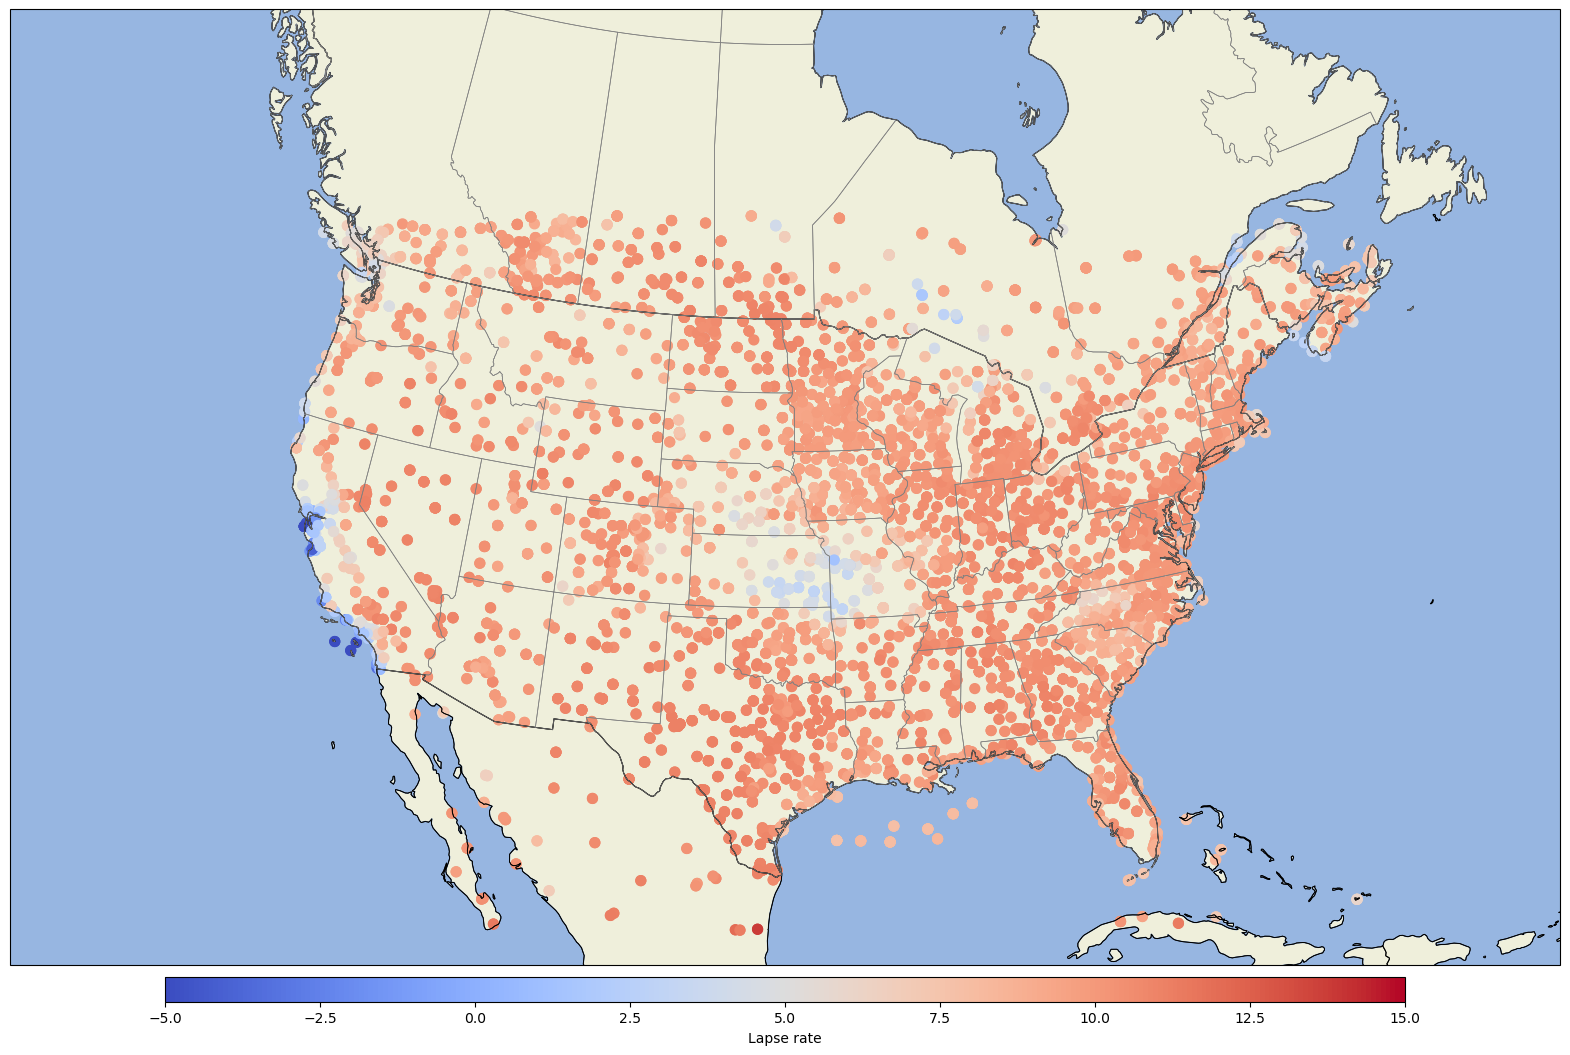

In [5]:
plot_var = "Lapserate"

clat = 40
maxlat = 58
minlat = 22
maxlon = -63
minlon = -131
area = [minlon, maxlon, minlat, maxlat]

label_val_dict = {"Press_diff": ["Pressure difference", 85, 115],
                  "Height_diff": ["Height difference", 900, 1100],
                  "Lapserate": ["Lapse rate", -5, 15]}

fig = plt.figure(figsize=(20, 16))
cartopy.config['data_dir'] = "/work2/noaa/wrfruc/span/natural_earth_data"
projection = ccrs.LambertConformal(central_longitude=-97, central_latitude=40,
                                   standard_parallels=(clat-5, clat+5))
#projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
ax = plt.axes(projection=projection)
ax.set_extent(area, crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
ax.add_feature(land, zorder=0)

ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['water'])
ax.add_feature(ocean, zorder=0)

# Add coastlines
coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', name='coastline')
ax.add_feature(coast, edgecolor='black', facecolor='none', linewidth=0.5)

# Add country borders
countries = cfeature.NaturalEarthFeature(category='cultural', scale='50m', name='admin_0_countries')
ax.add_feature(countries, edgecolor='black', facecolor='none', linewidth=0.7)

# Add state lines
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', name='admin_1_states_provinces')
ax.add_feature(states, edgecolor='gray', facecolor='none', linewidth=0.5)

# Scatter plot of the latitudes and longitudes
# 'Lat' is your latitude column, and 'Lon' is your longitude column
sc = ax.scatter(final_df['Lon'], final_df['Lat'], c=final_df[plot_var], cmap='coolwarm', 
                vmin=label_val_dict[plot_var][1], vmax=label_val_dict[plot_var][2], 
                transform=ccrs.PlateCarree(), s=50)
cbar = plt.colorbar(sc, label=label_val_dict[plot_var][0], orientation='horizontal', shrink=0.8, aspect=50, pad=0.01)